In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
renderer = 'png' # for interactive charts, change to plotly_mimetype or notebook

In [2]:
import pandas as pd
from order_flow_ticks import OrderFlowTicks

df_ticks = pd.read_parquet(f"data/US30_T1_2025_cT.parquet")
df_ticks.rename(columns={'bid': 'close'}, inplace=True)

df_ticks.head(3)
df_ticks.tail(3)
len(df_ticks)

,ask,close,spread
datetime,,,
2025-05-15 00:00:00.650,41839.4,41838.3,1.1
2025-05-15 00:00:01.002,41839.8,41838.7,1.1
2025-05-15 00:00:01.252,41840.2,41839.1,1.1


,ask,close,spread
datetime,,,
2025-05-16 20:54:59.640,42376.7,42375.6,1.1
2025-05-16 20:54:59.841,42377.1,42376.0,1.1
2025-05-16 20:55:00.000,42377.9,42376.8,1.1


180399

In [3]:
from renkodf import Renko
r = Renko(df_ticks, brick_size=5)
df_renko = r.renko_df('wicks')
df_renko.head(3)
df_renko.tail(3)
len(df_renko)

,open,high,low,close,volume
datetime,,,,,
2025-05-15 00:00:45.397,41840.0,41845.0,41833.8,41845.0,58.0
2025-05-15 00:01:24.001,41845.0,41850.0,41843.8,41850.0,29.0
2025-05-15 00:02:02.796,41850.0,41855.0,41847.1,41855.0,30.0


,open,high,low,close,volume
datetime,,,,,
2025-05-16 20:54:39.646,42390.0,42390.0,42385.0,42385.0,6.0
2025-05-16 20:54:47.441,42385.0,42388.3,42380.0,42380.0,27.0
2025-05-16 20:54:52.440,42380.0,42382.7,42375.0,42375.0,21.0


2926

In [4]:
odft = OrderFlowTicks(df_renko, df_ticks, 1.5, is_open_time=False)

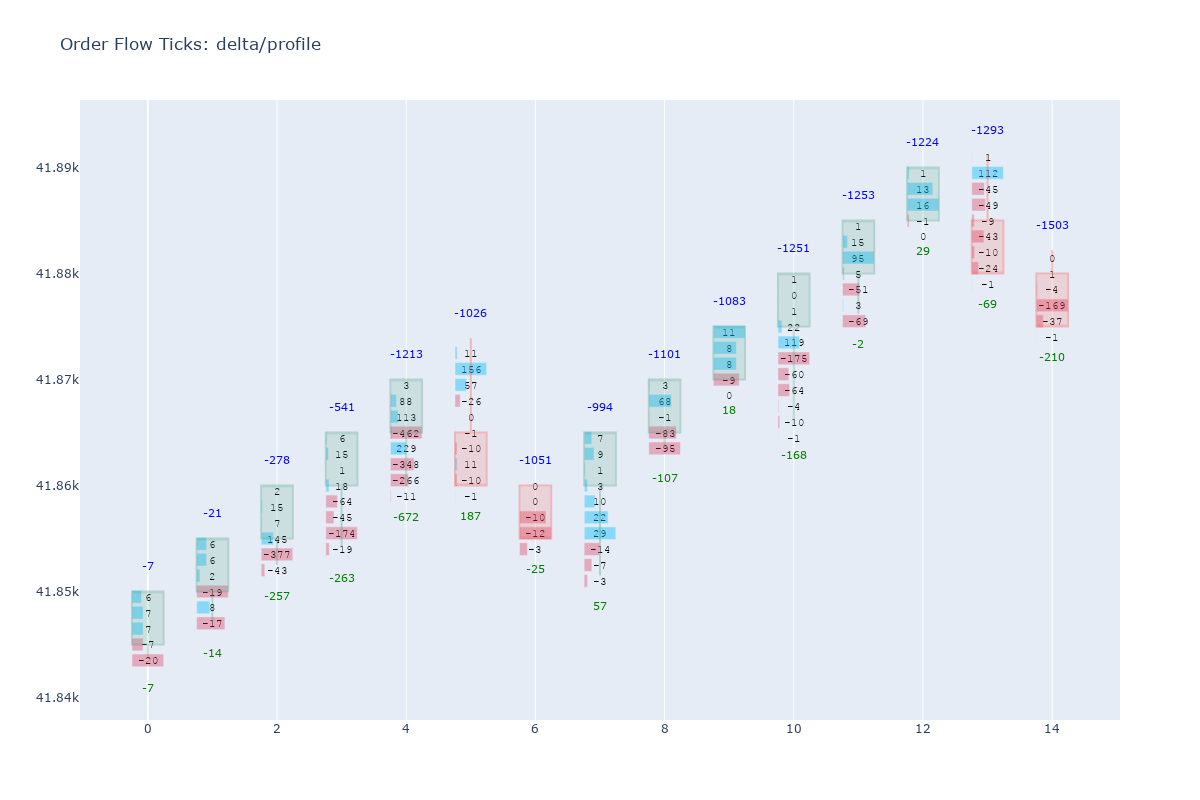

In [5]:
odft.plot(iloc_value=15, chart='candle', renderer=renderer)

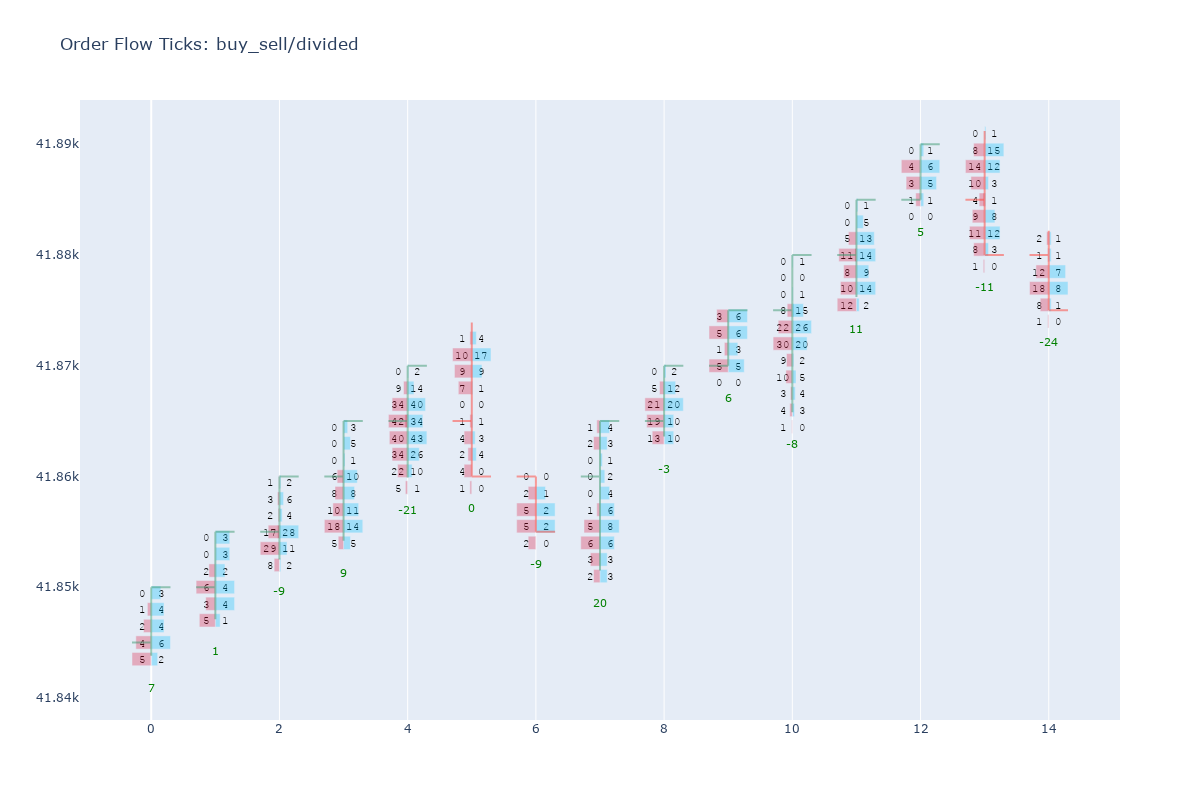

In [6]:
odft.plot(mode='buy_sell', view='divided', chart='ohlc', renderer=renderer)

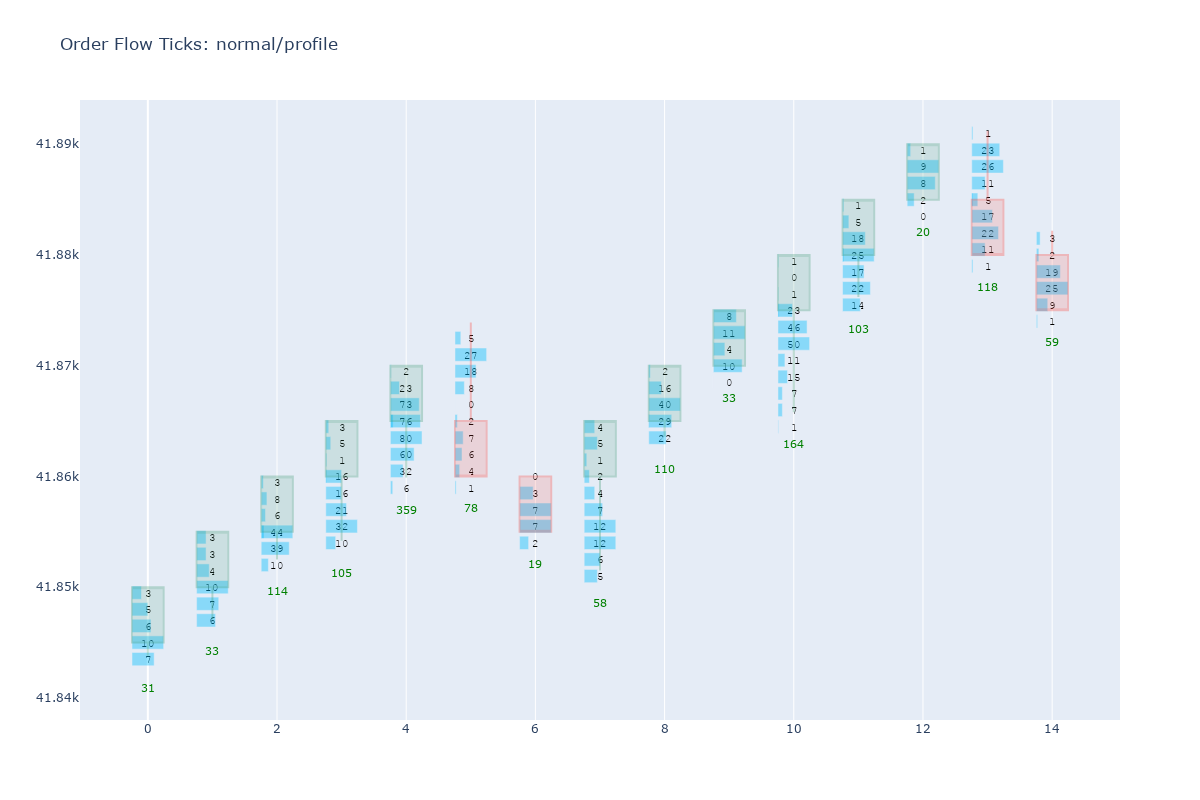

In [7]:
odft.plot(mode='normal', chart='candle', renderer=renderer)

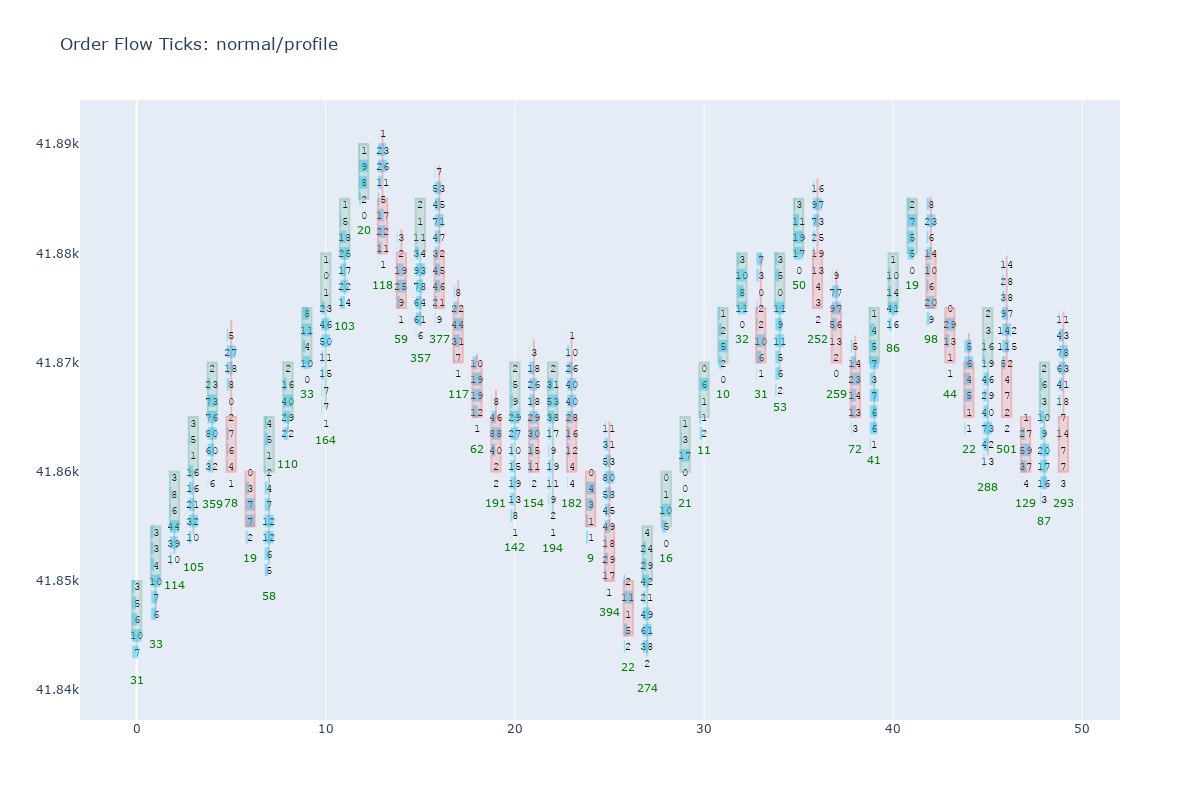

In [8]:
odft.plot(iloc_value=50, mode='normal', chart='candle', renderer=renderer)